# Tarea 5


Program a 4th-order Runge-Kutta function, called rk4, with the following inputs:

- A function. This function must be able to return a vector, in case you want to solve a system of equations.
- A tuple containing the initial time, final time, and step size.
- The initial values for all the variables.

Copy the code of your function into the box below. Be sure to write a description at the beginning of the function using the docstring convention.


In [ ]:
import numpy as np

def rk4(func,  t_span, y0):
    """
    4th-order Runge-Kutta 

    Parameters
    ----------
    func : the callable
        A function f(t, y) that returns the derivative dy/dt.
        It accepts:
          - t : float
          - y : array_like
        and return an array_like (vector) of the same shape as y (so you can solve systems).
     t_span : a tuple of floats
        (t0, tf, h):
          - t0 : the initial time
          - tf : the final time
          - h  : the step size
    y0 : array_like
        Initial value(s) of y at t = t0. Can be a scalar or a list/array for systems.

    Returns
    -------
    t : ndarray
        1D array of time points from t0 to tf with spacing h.
    y : ndarray
        2D array of solution values: each row corresponds to a time in `t`,
        and each column to one component of y.
    """

    t0, tf, h =  t_span
    t = np.arange(t0, tf + h, h)
    y0 = np.atleast_1d(y0).astype(float)
    y = np.zeros((len(t), y0.size))
    y[0] = y0

    for i in range(len(t) - 1):
        ti = t[i]
        yi = y[i]
        k1 = func(ti, yi)
        k2 = func(ti + h/2, yi + h*k1/2)
        k3 = func(ti + h/2, yi + h*k2/2)
        k4 = func(ti + h,yi + h*k3)
        y[i+1] = yi + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

    return t, y

In the following circuit 
![imagen](<circuito.png>)
The voltages of each capacitor are given by the following equations:

$$
\begin{aligned}
\frac{1}{R_{2}C_{3}} \frac{dV_{3}}{dt}+ \frac{1}{R_{2}C_{4}} \frac{dV_{4}}{dt}+V_{3}=V\\
\frac{1}{R_{4}C_{4}} \frac{dV_{4}}{dt}+V_{4}-V_{3}=0\\
\end{aligned}
$$

Where $R_2=R_4=100\Omega$, $C_3=50\mu f$, and $C_4=200\mu f$

Rewrite the equations in order to solve them using your RK4 method.


Para resolver el sistema de ecuaciones, la forma reescrita de estas en términos de un sistema de ecuaciones diferenciales de primer orden es la siguiente:

$$
\begin{aligned}
\begin{cases}
\frac{dV_{3}}{dt} = C_3 \Big[R_2(V-V_3)-R_4(V_3-V_4) \Big]=0.005(V-2V_3+V_4) \\
\frac{dV_{4}}{dt} = R_4C_4(V_3-V_4)=0.02(V_3-V_4) \\
\end{cases}
\end{aligned}
$$

   *Procedimientos*
   $$
   \frac{1}{R_{2}C_{3}}\,\frac{dV_{3}}{dt}
   \;+\;\frac{1}{R_{2}C_{4}}\,\frac{dV_{4}}{dt}
   \;+\;V_{3}
   =V
   \tag{1}
   $$
   $$
   \frac{1}{R_{4}C_{4}}\,\frac{dV_{4}}{dt}
   \;+\;(V_{4}-V_{3})
   =0
   \tag{2}
   $$

De

$$
\frac{1}{R_{4}C_{4}}\,\dot V_{4} + V_{4} - V_{3} = 0
\;\Longrightarrow\;
\dot V_{4}
= -\,R_{4}\,C_{4}\,(V_{4}-V_{3})
=  R_{4}\,C_{4}\,(V_{3}-V_{4}).
$$

Con $R_{4}=100\,\Omega$ y $C_{4}=200\times10^{-6}\,\mathrm F$,

$$
R_{4}C_{4}
=100 \times 200\times10^{-6}
=0.02
\;\Longrightarrow\;
\boxed{\dot V_{4}=0.02\,(V_{3}-V_{4}).}
$$

Sustituyendo $\dot V_{4}$ en la primera ecuación y resolviendo para $\displaystyle \dot V_{3}$

La ecuación 1 es
$$
\frac{1}{R_{2}C_{3}}\,\dot V_{3}
\;+\;\frac{1}{R_{2}C_{4}}\,\dot V_{4}
\;+\;V_{3}
=V.
$$
Multiplicando ambos lados por $R_{2}$:
$$
\frac{1}{C_{3}}\,\dot V_{3}
\;+\;\frac{1}{C_{4}}\,\dot V_{4}
=R_{2}\,(V - V_{3}).
$$
Poniendo $\dot V_{4}=R_{4}C_{4}(V_{3}-V_{4})$:
$$
\frac{1}{C_{3}}\,\dot V_{3}
\;+\;\frac{1}{C_{4}}\bigl[R_{4}C_{4}\,(V_{3}-V_{4})\bigr]
=R_{2}(V - V_{3}),
$$
$$
\frac{1}{C_{3}}\,\dot V_{3}
+R_{4}\,(V_{3}-V_{4})
=R_{2}(V - V_{3}),
$$
$$
\dot V_{3}
= C_{3}\Bigl[R_{2}(V - V_{3}) - R_{4}(V_{3} - V_{4})\Bigr].
$$

Con $R_{2}=100\,\Omega$, $C_{3}=50\times10^{-6}\,\mathrm F$,

$$
C_{3}R_{2}
=50\times10^{-6}\times100
=0.005
\;\Longrightarrow\;
\boxed{\dot V_{3}=0.005\,(V - 2V_{3} + V_{4}).}
$$


Finalmente, el sistema de ecuaciones diferenciales de primer orden es:
$$
\begin{cases}
\displaystyle \dot V_{3} = 0.005\,\bigl(V - 2\,V_{3} + V_{4}\bigr),\\
\displaystyle \dot V_{4} = 0.02\,\bigl(V_{3} - V_{4}\bigr)
\end{cases}
$$



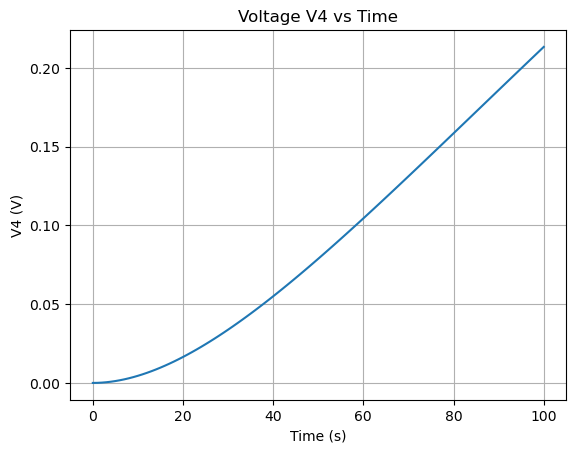

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def rk4(func,  t_span, y0):
    """
    4th-order Runge–Kutta ODE function

    Parameters
    ----------
    func : the callable
        A function f(t, y) that returns the derivative dy/dt.
        It accepts:
          - t : float
          - y : array_like
        and return an array_like (vector) of the same shape as y (so you can solve systems).
     t_span : tuple of floats
        (t0, tf, h):
          - t0 : initial time
          - tf : final time
          - h  : step size
    y0 : array_like
        Initial value(s) of y at t = t0. Can be a scalar or a list/array for systems.

    Returns
    -------
    t : ndarray
        1D array of time points from t0 to tf with spacing h.
    y : ndarray
        2D array of solution values: each row corresponds to a time in `t`,
        and each column to one component of y.
    """

    t0, tf, h =  t_span
    t = np.arange(t0, tf + h, h)
    y0 = np.atleast_1d(y0).astype(float)
    y = np.zeros((len(t), y0.size))
    y[0] = y0

    for i in range(len(t) - 1):
        ti = t[i]
        yi = y[i]
        k1 = func(ti, yi)
        k2 = func(ti + h/2, yi + h*k1/2)
        k3 = func(ti + h/2, yi + h*k2/2)
        k4 = func(ti + h,yi + h*k3)
        y[i+1] = yi + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

    return t, y 

R2 = R4 = 100.0         # Ohms
C3 = 50e-6              # Farads
C4 = 200e-6             # Farads
V_supply = 1.0          # Volt (unit step input)

# System of ODEs derived:
# dV3/dt = 0.005 * (V - 2*V3 + V4)
# dV4/dt = 0.02  * (V3 - V4)
def circuit_odes(t, vars):
    V3, V4 = vars
    dV4_dt = R4 * C4 * (V3 - V4)
    dV3_dt = C3 * (R2 * (V_supply - V3) - R4 * (V3 - V4))
    return np.array([dV3_dt, dV4_dt])

# Initial conditions and integration span
y0 = [0.0, 0.0]            # V3(0)=0, V4(0)=0
t_span = (0.0, 100, 1) # simulate from 0 to 0.05 s with step 0.0001 s

# Solve
t, y = rk4(circuit_odes,  t_span, y0)
V4 = y[:, 1]

# Plot V4 vs time
plt.figure()
plt.plot(t, V4)
plt.xlabel('Time (s)')
plt.ylabel('V4 (V)')
plt.title('Voltage V4 vs Time')
plt.grid(True)
plt.show()# Given parameters
R2 = R4 = 100.0         # Ohms
C3 = 50e-6              # Farads
C4 = 200e-6             # Farads
V_supply = 1.0          # Volt (unit step input)
